<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Flipkart_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  seaborn as sns
import plotly.express as px
from  nltk.sentiment.vader import SentimentIntensityAnalyzer

data=pd.read_csv('reviews_data.csv')
print(data.head())


                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [ ]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [ ]:
import nltk
import string
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('\n','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w\d\w*','',text)
  text=[word for word in text.split() if word not in stopwords]
  text=''.join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=' '.join(text)
  return text
  data['Review']=data['Review'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ratings= data['Rating'].value_counts()
number=ratings.index
quantity=ratings.values

import plotly.express as px
fig=px.pie(data,names=number,values=quantity,hole=0.5)
fig.show()

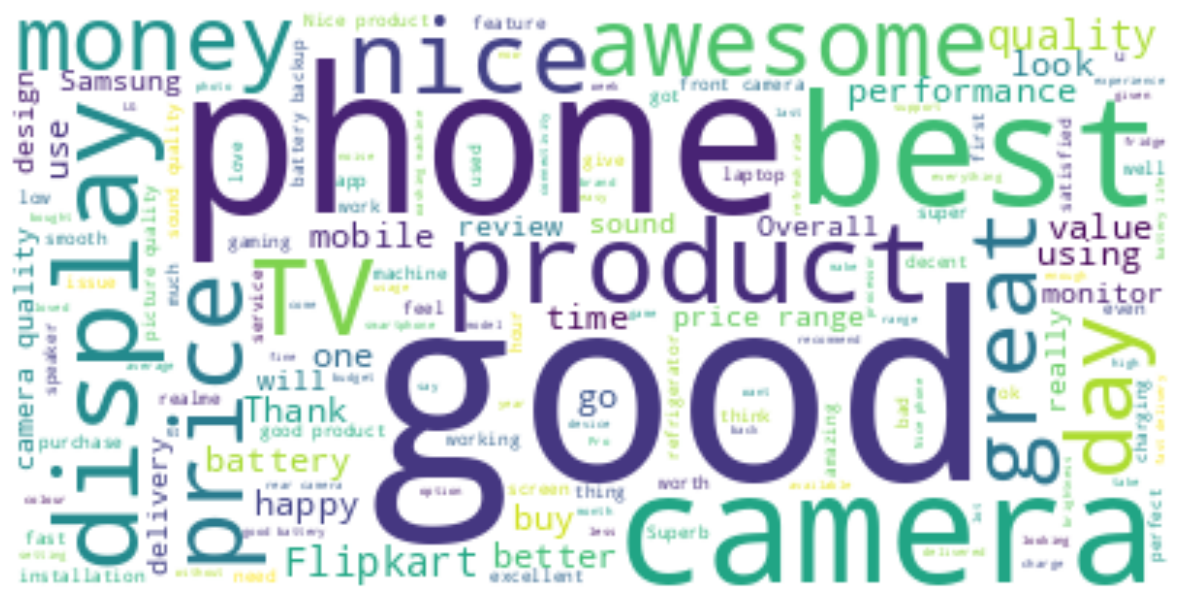

In [ ]:
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt

text =' '.join(i for i in data.Review)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data['Positive'] =[sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] =[sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] =[sentiments.polarity_scores(i)['neu'] for i in data['Review']]
data[['Review','Positive','Negative','Neutral']]

print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  Positive  \
0  Best under 60k Great performanceI got it for a...       5     0.314   
1                                 Good perfomence...       5     0.744   
2  Great performance but usually it has also that...       5     0.119   
3           My wife is so happy and best product 👌🏻😘       5     0.568   
4  Light weight laptop with new amazing features,...       5     0.467   

   Negative  Neutral  
0     0.073    0.613  
1     0.000    0.256  
2     0.000    0.881  
3     0.000    0.432  
4     0.000    0.533  


In [ ]:
x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])

def sentiment(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
      print('Negative')
  else:
    print('Neutral')
sentiment(x,y,z)

Neutral


In [ ]:

print('Positive :',x )
print('Negative:',y)
print('Neutral: ',z)

Positive : 835.669999999999
Negative: 104.91700000000004
Neutral:  1363.413000000003
